# Setup

In [238]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
import calendar


tdb = pd.read_csv('./fct_invoice.csv')

with open('dim_customer.json') as user_file:
    cdb = json.loads(user_file.read())

def db_counter(db, header):
    counter = {}
    for i in db[header]:
        if i in counter:
            counter[i] += 1
        else:
            counter[i] = 1
    return counter

def create_plot(title, xvalues, yvalues, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.bar(xvalues, yvalues, color='gray', width=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Easy

### Question 1: How many unique customers are in the dataset?

In [239]:
print('There are ' + str((len(cdb['id']))) + ' customers in the dataset.')

There are 5191 customers in the dataset.


### Question 2: What are the different categories of products available? How many unique categories are there?

In [240]:
print('The different categories of products available are:' + ''.join(['\n    ' + i for i in sorted(set(tdb['category']))]) + '\n\nThe number of unique categories is ' + str(len(set(tdb['category']))) + '.')

The different categories of products available are:
    Books
    Clothing
    Cosmetics
    Food & Beverage
    Shoes
    Souvenir
    Technology
    Toys

The number of unique categories is 8.


### Question 3: Which payment method is the most popular? How many times was it used?

In [241]:
print('The most popular payment method is ' + Counter(tdb['payment_method']).most_common(1)[0][0] + '. It was used ' + str(Counter(tdb['payment_method']).most_common(1)[0][1]) + ' times.')

The most popular payment method is Cash. It was used 44447 times.


# Medium

### Question 1: What are the three most popular categories, by total sales?

In [242]:
print('The three most popular categories by total sales are:' + ''.join(['\n    ' + Counter(db_counter(tdb, 'category')).most_common(3)[i][0] + ': ' + str(Counter(db_counter(tdb, 'category')).most_common(3)[i][1]) for i in range(3)]))

The three most popular categories by total sales are:
    Clothing: 34487
    Cosmetics: 15097
    Food & Beverage: 14776


### Question 2

In [243]:
print('The total sales attributed to customers over the age of 45 is ' + str(sum(1 for i in tdb['customer_id'] if i in [cdb['id'][index] for index, age in cdb['age'].items() if age is not None and age > 45])) + '.')

The total sales attributed to customers over the age of 45 is 32627.


### Question 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

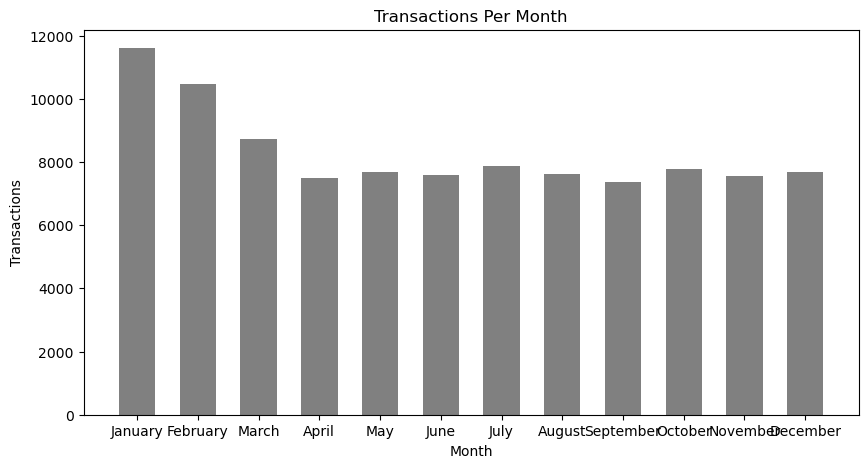

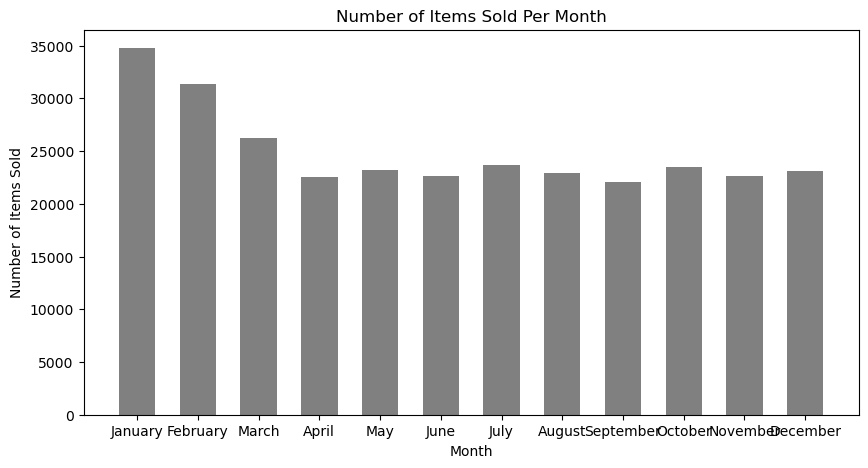

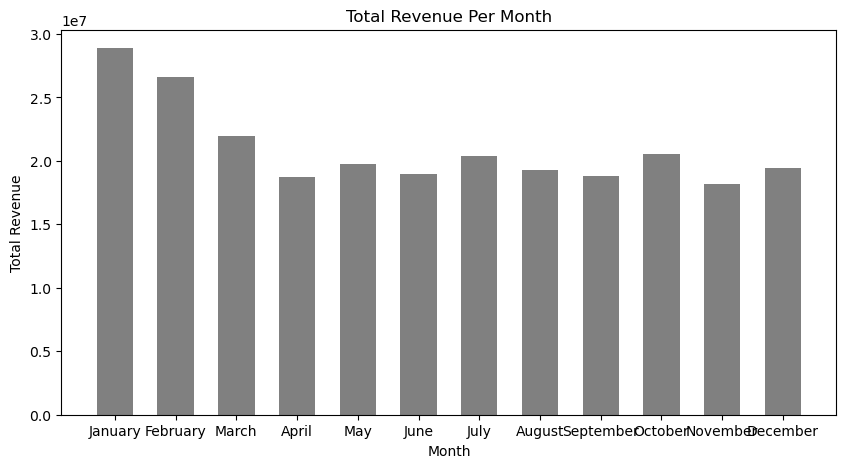

Based on the data, there seems to be an increase in sales during the start of the year.


In [244]:
sales_per_month = {
    'transactions':
        {'January': 0, 'February': 0, 'March': 0, 'April': 0,
         'May': 0, 'June': 0, 'July': 0, 'August': 0, 'September': 0,
         'October': 0, 'November': 0, 'December': 0},
    'quantity':
        {'January': 0, 'February': 0, 'March': 0, 'April': 0,
         'May': 0, 'June': 0, 'July': 0, 'August': 0, 'September': 0,
         'October': 0, 'November': 0, 'December': 0},
    'revenue':
        {'January': 0, 'February': 0, 'March': 0, 'April': 0,
         'May': 0, 'June': 0, 'July': 0, 'August': 0, 'September': 0,
         'October': 0, 'November': 0, 'December': 0}
                  }

for i in range(len(tdb['invoice_date'])):
    sales_per_month['transactions'][calendar.month_name[int(tdb['invoice_date'][i].split('/')[1])]] += 1
    sales_per_month['quantity'][calendar.month_name[int(tdb['invoice_date'][i].split('/')[1])]] += tdb['quantity'][i]
    sales_per_month['revenue'][calendar.month_name[int(tdb['invoice_date'][i].split('/')[1])]] += tdb['price'][i] * tdb['quantity'][i]
    
create_plot('Transactions Per Month', sales_per_month['transactions'].keys(), sales_per_month['transactions'].values(), 'Month', "Transactions")
create_plot('Number of Items Sold Per Month', sales_per_month['quantity'].keys(), sales_per_month['quantity'].values(), 'Month', "Number of Items Sold")
create_plot('Total Revenue Per Month', sales_per_month['revenue'].keys(), sales_per_month['revenue'].values(), 'Month', "Total Revenue")

print('Based on the data, there seems to be an increase in sales during the start of the year.')

# Hard

### Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [245]:
total_revenue = [tdb['quantity'][i] * tdb['price'][i] for i in range(len(tdb['invoice_no']))]

age_range_of_customer = []
for t_id in tdb['customer_id']:
    for index, c_id in cdb['id'].items():
        if c_id == t_id:
            customer_age = cdb['age'][index]
            if customer_age is None:
                age_range_of_customer.append(None)
            elif customer_age >= 10 and customer_age < 20:
                age_range_of_customer.append('10-19')
            elif customer_age >= 20 and customer_age < 30:
                age_range_of_customer.append('20-29')
            elif customer_age >= 30 and customer_age < 40:
                age_range_of_customer.append('30-39')
            elif customer_age >= 40 and customer_age < 50:
                age_range_of_customer.append('40-49')
            elif customer_age >= 50 and customer_age < 60:
                age_range_of_customer.append('50-59')
            elif customer_age >= 60 and customer_age < 70:
                age_range_of_customer.append('60-69')
            elif customer_age >= 70 and customer_age < 80:
                age_range_of_customer.append('70-79')
            elif customer_age >= 80 and customer_age < 90:
                age_range_of_customer.append('80-89')

tdb['age_range_of_customer'] = age_range_of_customer
tdb['total_revenue'] = total_revenue

In [246]:
pivot_table = pd.pivot_table(tdb, values = ['total_revenue'], index = 'category', columns = 'age_range_of_customer', aggfunc="sum")
pivot_table

total_revenue                                         \
age_range_of_customer         10-19        20-29        30-39        40-49   
category                                                                     
Books                      12801.75     79461.75     84143.10     87203.40   
Clothing                 1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics                 109619.36    605915.32    723544.70    665034.96   
Food & Beverage            13582.31     73491.96     87246.86     89553.29   
Shoes                     993281.35   5924878.24   7200839.66   7025590.02   
Souvenir                   12375.15     54943.32     64092.72     66391.80   
Technology               1129800.00   5261550.00   6159300.00   5954550.00   
Toys                       60426.24    385100.80    420582.40    390906.88   

                                                                         
age_range_of_customer        50-59        60-69       70-79       80-89  
category                                                                 
Books                     74962.20     80476.80    54827.85    26664.00  
Clothing               10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics                587780.96    649990.76   419082.62   254531.60  
Food & Beverage           72425.04     80976.09    55050.98    31332.93  
Shoes                   5852857.84   5978893.54  4480269.05  2628744.60  
Souvenir                  54943.32     55025.43    38673.81    23718.06  
Technology              4435200.00   5471550.00  3638250.00  1946700.00  
Toys                     345067.52    363955.20   273244.16   153932.80